# AAPL (APPLE STOCKS) validated in one year

In [1]:
#!pip install regex
#!pip install pandas-ta
#!pip install yfinance

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf
import matplotlib.pyplot as plt
import yfinance as yf

# Step 1: Get Historic Pricing Data

In [3]:
# Importing data from an API
df = yf.download('AAPL', start='2021-08-15', end='2022-08-15')
df.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-16,148.539993,151.190002,146.470001,151.119995,150.277893,103296000
2021-08-17,150.229996,151.679993,149.089996,150.190002,149.353088,92229700
2021-08-18,149.800003,150.720001,146.149994,146.360001,145.544449,86326000
2021-08-19,145.029999,148.000000,144.500000,146.699997,145.882538,86960300
2021-08-20,147.440002,148.500000,146.779999,148.190002,147.364227,60549600


In [4]:
# Show some summary statistics
print(df.describe())

             Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   157.105179  159.129442  155.303426  157.320120  156.790447   
std     12.541994   12.584989   12.376535   12.481311   12.438479   
min    130.070007  132.389999  129.039993  130.059998  129.879593   
25%    147.459999  149.059998  146.259995  147.894997  147.277611   
50%    155.910004  158.229996  153.979996  156.770004  156.163788   
75%    168.150002  170.325005  166.020004  167.529999  167.052177   
max    182.630005  182.940002  179.119995  182.009995  181.259918   

             Volume  
count  2.510000e+02  
mean   8.852741e+07  
std    2.640506e+07  
min    4.100000e+07  
25%    6.953115e+07  
50%    8.328130e+07  
75%    1.011393e+08  
max    1.954327e+08  


# Step 2: Prepare the data


In [5]:
# Keep only the 'Adj Close' Value
tsla_df = df[['Adj Close']]

In [6]:
# Re-inspect data
print(tsla_df)

             Adj Close
Date                  
2021-08-16  150.277893
2021-08-17  149.353088
2021-08-18  145.544449
2021-08-19  145.882538
2021-08-20  147.364227
...                ...
2022-08-08  164.869995
2022-08-09  164.919998
2022-08-10  169.240005
2022-08-11  168.490005
2022-08-12  172.100006

[251 rows x 1 columns]


In [7]:
# Print Info
print(tsla_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2021-08-16 to 2022-08-12
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  251 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB
None


<AxesSubplot:title={'center':'Tesla stock'}, xlabel='Date'>

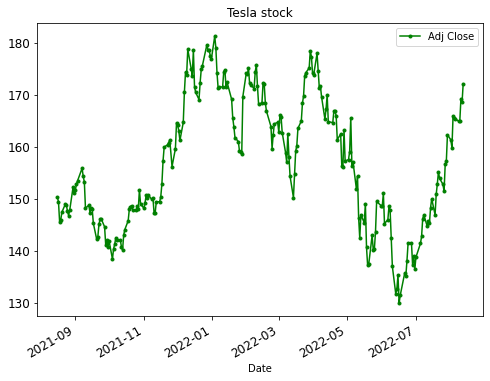

In [8]:
# Plotting the Adj Close columns
tsla_df.plot(figsize=(8,6), color='green', title='Tesla stock', fontsize=12, marker=".")

#tsla_df.plot.density()

# Step 3: Adding Technical Indicators

In [9]:
import pandas_ta
# Add EMA to dataframe by appending
# Note: pandas_ta integrates seamlessly into
# our existing dataframe
tsla_df.ta.ema(close='Adj Close', length=10, append=True)

/Users/Fabiola/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/pandas_ta/core.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ind_name] = result


Date
2021-08-16           NaN
2021-08-17           NaN
2021-08-18           NaN
2021-08-19           NaN
2021-08-20           NaN
                 ...    
2022-08-08    161.342405
2022-08-09    161.992877
2022-08-10    163.310537
2022-08-11    164.252258
2022-08-12    165.679121
Name: EMA_10, Length: 251, dtype: float64

In [10]:
# Adding EMA_10 technical indicator
tsla_df.ta.ema(close='adj_close', length=10, append=True)

[X] Ooops!!! It's True, the series 'adj_close' was not found in Adj Close, EMA_10


,Adj Close,EMA_10
Date,,
2021-08-16,150.277893,NaN
2021-08-17,149.353088,NaN
2021-08-18,145.544449,NaN
2021-08-19,145.882538,NaN
2021-08-20,147.364227,NaN
...,...,...
2022-08-08,164.869995,161.342405
2022-08-09,164.919998,161.992877
2022-08-10,169.240005,163.310537


In [11]:
#Drop the first n-rows = 9
tsla_df = tsla_df.iloc[9:]

In [12]:
tsla_df.head()

,Adj Close,EMA_10
Date,,
2021-08-27,147.771942,147.810730
2021-08-30,152.266769,148.620919
2021-08-31,150.983963,149.050563
2021-09-01,151.660156,149.525035
2021-09-02,152.793808,150.119357


<AxesSubplot:title={'center':'Tesla stock and EMA'}, xlabel='Date'>

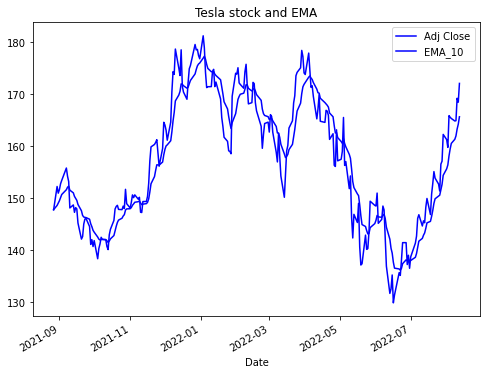

In [13]:
tsla_df.plot(figsize=(8,6), color='Blue', title='Tesla stock and EMA', fontsize=10)

# Step 4: Test-Train Split

In [14]:
# Split data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(tsla_df[['Adj Close']], tsla_df[['EMA_10']], test_size=.2)


In [15]:
# Tests set
print(X_test.describe())


        Adj Close
count   49.000000
mean   157.355125
std     13.373254
min    136.939789
25%    146.011826
50%    156.163788
75%    168.490005
max    181.259918


In [16]:
# Training set 80% data
print(X_train.describe())

        Adj Close
count  193.000000
mean   157.065625
std     12.357162
min    129.879593
25%    147.754776
50%    157.061829
75%    167.181808
max    178.959457


In [17]:
print(y_train.describe())

           EMA_10
count  193.000000
mean   156.716638
std     11.454818
min    136.174076
25%    146.695481
50%    157.688083
75%    166.402883
max    177.330815


# Step 5: Training the Model

In [18]:
from sklearn.linear_model import LinearRegression
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Use model to make predictions
y_pred = model.predict(X_test)

In [19]:
y_pred[:10]

array([[164.41991438],
       [152.55356549],
       [142.19277684],
       [169.22165839],
       [160.77233572],
       [152.02732031],
       [165.26765161],
       [148.97344363],
       [144.07341336],
       [172.37502592]])

In [20]:
# Converting y_pred array into a data frame: y_pred_df
y_pred_df = y_pred
y_pred_df = pd.DataFrame(y_pred_df, columns=['y_predict'])
y_pred_df.head()

,y_predict
0,164.419914
1,152.553565
2,142.192777
3,169.221658
4,160.772336


In [21]:
len(y_pred_df)

49

# Step 6: Validating the Fit

In [22]:
# Homework -To plot the confidence intervals
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))


Model Coefficients: [[0.86751362]]
Mean Absolute Error: 2.8139699629534674
Coefficient of Determination: 0.9267564259269709


The MAE is the arithmetic mean of the absolute errors of our model, calculated by summing the absolute difference between observed values of X and Y and dividing by the total number of observations.

For now, let’s just recognize that a lower MAE value is better, and the closer our coefficient of the correlation value is to 1.0 the better. The metrics here suggest that our model fits our data well, though the MAE is slightly high.

### End

In [23]:
# Extra code: to visualize real values Vs predicted values
# Predicted values vs Real values

In [24]:
# Visualizing data
y_test.head(2)
#y_pred

,EMA_10
Date,
2022-04-21,167.530515
2021-08-30,148.620919


In [25]:
# Assigning indexes
y_pred_df2 = y_pred_df.copy()
y_pred_df2.index= y_test.index
y_pred_df2.head()

,y_predict
Date,
2022-04-21,164.419914
2021-08-30,152.553565
2021-10-05,142.192777
2022-01-10,169.221658
2022-01-21,160.772336


In [26]:
# Concating y_test and y_pred_fd2 to compare real values Vs predicted values
final_df = pd.concat([y_test,y_pred_df2],axis=1)
final_df.head()

,EMA_10,y_predict
Date,,
2022-04-21,167.530515,164.419914
2021-08-30,148.620919,152.553565
2021-10-05,142.143619,142.192777
2022-01-10,174.346871,169.221658
2022-01-21,168.569233,160.772336


In [27]:
# Checkinh if there are null values
final_df.isnull().sum()

EMA_10       0
y_predict    0
dtype: int64

<AxesSubplot:title={'center':'X_test'}, xlabel='Date'>

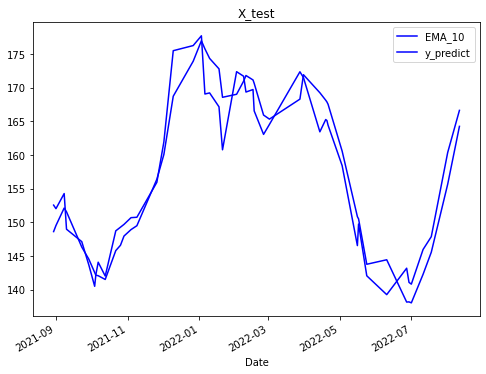

In [28]:
# Comparision of X_test vs y_predict
final_df.plot(figsize=(8,6), color='Blue', title='X_test', fontsize=10)